# Global Oil Demand Model - A Udacity Data Scientist Project

## 1. Business Understanding
### 1.1 What is the Problem? 
Advancing the understanding of global oil demand is critical for understanding world's economy, better business planning, managing risks to global commodity market. 

  Question 1: What does the global oil demand look like?
  
  Question 2: What does the global GPD growth look like?
  
  Question 3: What does the crude oil price history look like?
  
  Question 4: How does global oil demand correlate with global GDP and crude oil price?

### 1.2 Who are the stakeholders?
Policy makers, business with exposure to commodity market volaatility (oil and gas producers, petrochemical companies, manufacturing companies), banks, brokers, hedge farms, and even everyday people who drive a car

### 1.3 What is the Goal?
The goal of this exercise is to understand the historic trend of global oil demand and establish a correlation with global GDP and Brent oil price

## 2. Data Understanding and Preparation
### 2.1 Data Source and Data Understanding
The raw data are downloaded from either world bank databank database or US Energy Information Administration (EIA). we use df.head() and df.describe() to perform basic data understanding of the structure and the format of the data


In [1]:
## 2. Data Understanding and Preparation
### 2.1 Data Source and Data Understanding

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # For splitting data
from sklearn.metrics import mean_squared_error, r2_score # For evaluation

# Specify the path to the CSV file
file_path = 'World Oil Demand.csv'


# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

df.head()

,Year,Global Oil Demand,Global GDP,Global Population,Brent Oil Price,Urbanization
0,1997,73.09,3.176730e+13,5908466557,19.11,45.484168
1,1998,73.91,3.171110e+13,5994040064,12.76,45.847404
2,1999,75.52,3.275730e+13,6078404337,17.90,46.215729
3,2000,77.05,3.386870e+13,6161884811,28.66,46.594728
4,2001,77.76,3.366230e+13,6245112906,24.46,47.039142


In [2]:
df.describe()

,Year,Global Oil Demand,Global GDP,Global Population,Brent Oil Price,Urbanization
count,28.000000,28.000000,2.800000e+01,2.800000e+01,28.000000,28.000000
mean,2010.500000,88.920714,6.628862e+13,7.045204e+09,61.370000,51.589688
std,8.225975,9.089028,2.490943e+13,6.912429e+08,30.565098,3.804032
min,1997.000000,73.090000,3.171110e+13,5.908467e+09,12.760000,45.484168
25%,2003.750000,82.650000,4.293782e+13,6.472015e+09,35.907500,48.399578
50%,2010.500000,89.080000,7.046755e+13,7.044193e+09,63.020000,51.701049
75%,2017.250000,96.817500,8.301025e+13,7.635435e+09,81.012500,54.760815
max,2024.000000,102.910000,1.113260e+14,8.142056e+09,111.630000,57.700639


### 2.2 Data Cleaning and Combining
A Pandas dataframe is created to store the raw data. After performing basic data understanding step, we decide that we would like to calculate the Year over Year (YoY) change and change in percentage for visualization purpose. <.dropna()> is used to drop out the "NaN"s.
    

In [3]:
### 2.2 Data Cleaning and Combining

def YoYChange(df):
    '''
    Define a function to calculate the Year-over-Year (YoY) change
    Input: A dataframe variable
    Output: A dataframe variable that is the difference of two neighboring periods
    '''
    return df - df.shift(1) 

# Calculate YoY change in absolute value and percent of changes
df["YoY Global Oil Demand Growth (MBD)"]=YoYChange(df["Global Oil Demand"])
df["Growth% Global Oil Demand"] = df["Global Oil Demand"].pct_change()

df["YoY GDP Growth (USD)"] = YoYChange(df["Global GDP"])
df["Growth% YoY GDP Growth"] = df["Global GDP"].pct_change()

df["YoY Global Population Growth"] =YoYChange(df["Global Population"])
df["Growth% YoY Population"] = df["Global Population"].pct_change()

df["YoY Brent Price"] = YoYChange(df["Brent Oil Price"])
df["Change% Brent Price"] = df["Brent Oil Price"].pct_change()

df["Oil Demand per Capita (BD)"] = df["Global Oil Demand"] / df["Global Population"] * 10**6
df["YoY Oil Demand per Capita (BD)"] = YoYChange(df["Oil Demand per Capita (BD)"])
df["Growth% YoY Oil Demand per Capita (BD)"] = df["Oil Demand per Capita (BD)"].pct_change()

df["GDP per Capita"] = df["Global GDP"] / df["Global Population"]
df["YoY GDP per Capita"] = YoYChange(df["GDP per Capita"])
df["Growth% YoY GDP per Capita"] = df["GDP per Capita"].pct_change()

df["lg_OilDemandPerCapita"] = np.log(df["Oil Demand per Capita (BD)"])
df["lg_GDPPerCapita"] = np.log(df["GDP per Capita"])

# Display the first few rows of the DataFrame to verify the import
df_cleaned =df.dropna()

In [4]:
df_cleaned.head()

,Year,Global Oil Demand,Global GDP,Global Population,Brent Oil Price,Urbanization,YoY Global Oil Demand Growth (MBD),Growth% Global Oil Demand,YoY GDP Growth (USD),Growth% YoY GDP Growth,...,YoY Brent Price,Change% Brent Price,Oil Demand per Capita (BD),YoY Oil Demand per Capita (BD),Growth% YoY Oil Demand per Capita (BD),GDP per Capita,YoY GDP per Capita,Growth% YoY GDP per Capita,lg_OilDemandPerCapita,lg_GDPPerCapita
1,1998,73.91,3.171110e+13,5994040064,12.76,45.847404,0.82,0.011219,-5.620000e+10,-0.001769,...,-6.35,-0.332287,0.012331,-0.000040,-0.003218,5290.438446,-86.134256,-0.016020,-4.395673,8.573656
2,1999,75.52,3.275730e+13,6078404337,17.90,46.215729,1.61,0.021783,1.046200e+12,0.032992,...,5.14,0.402821,0.012424,0.000094,0.007602,5389.128163,98.689717,0.018654,-4.388100,8.592139
3,2000,77.05,3.386870e+13,6161884811,28.66,46.594728,1.53,0.020260,1.111400e+12,0.033928,...,10.76,0.601117,0.012504,0.000080,0.006437,5496.483793,107.355630,0.019921,-4.381683,8.611864
4,2001,77.76,3.366230e+13,6245112906,24.46,47.039142,0.71,0.009215,-2.064000e+11,-0.006094,...,-4.20,-0.146546,0.012451,-0.000053,-0.004235,5390.182773,-106.301021,-0.019340,-4.385927,8.592335
5,2002,78.64,3.495990e+13,6327557399,24.99,47.530175,0.88,0.011317,1.297600e+12,0.038548,...,0.53,0.021668,0.012428,-0.000023,-0.001860,5525.022974,134.840201,0.025016,-4.387789,8.617043


### 2.3 Data Statistics
The following table calcuates our data's basic statistics including mean, standard deviation, etc.

In [5]:
## 2.3 Data Statistics¶

df_cleaned.describe()

,Year,Global Oil Demand,Global GDP,Global Population,Brent Oil Price,Urbanization,YoY Global Oil Demand Growth (MBD),Growth% Global Oil Demand,YoY GDP Growth (USD),Growth% YoY GDP Growth,...,YoY Brent Price,Change% Brent Price,Oil Demand per Capita (BD),YoY Oil Demand per Capita (BD),Growth% YoY Oil Demand per Capita (BD),GDP per Capita,YoY GDP per Capita,Growth% YoY GDP per Capita,lg_OilDemandPerCapita,lg_GDPPerCapita
count,27.000000,27.000000,2.700000e+01,2.700000e+01,27.000000,27.000000,27.000000,27.000000,2.700000e+01,27.000000,...,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,2011.000000,89.507037,6.756719e+13,7.087305e+09,62.935185,51.815819,1.104444,0.013075,2.946619e+12,0.048867,...,2.274444,0.099650,0.012628,0.000010,0.001115,9303.124189,307.273549,0.036490,-4.372084,9.095165
std,7.937254,8.705852,2.442972e+13,6.668243e+08,29.982065,3.679725,2.443258,0.025415,3.507851e+12,0.053619,...,18.756550,0.308472,0.000299,0.000319,0.025178,2619.451803,478.015625,0.053109,0.024094,0.308149
min,1998.000000,73.910000,3.171110e+13,5.994040e+09,12.760000,45.847404,-9.490000,-0.094297,-4.523800e+12,-0.056373,...,-46.650000,-0.471355,0.011604,-0.001335,-0.103148,5290.438446,-736.398307,-0.067486,-4.456409,8.573656
25%,2004.500000,84.050000,4.601475e+13,6.534306e+09,40.110000,48.776780,0.765000,0.009712,1.172550e+12,0.019283,...,-6.695000,-0.122614,0.012458,-0.000044,-0.003487,7040.527427,74.289434,0.006996,-4.385381,8.858877
50%,2011.000000,89.370000,7.421300e+13,7.087120e+09,64.300000,51.923990,1.460000,0.015288,3.665700e+12,0.040712,...,3.860000,0.111725,0.012639,0.000045,0.003524,10175.404676,401.198907,0.030860,-4.370943,9.227729
75%,2017.500000,96.865000,8.404570e+13,7.656120e+09,81.505000,54.871505,1.735000,0.021319,4.996900e+12,0.089644,...,13.535000,0.332190,0.012863,0.000095,0.007683,10937.491377,576.601083,0.076173,-4.353416,9.299949
max,2024.000000,102.910000,1.113260e+14,8.142056e+09,111.630000,57.700639,5.620000,0.061657,1.224910e+13,0.142239,...,31.650000,0.688751,0.013044,0.000613,0.052839,13672.958513,1455.380404,0.132752,-4.339395,9.523175


### 2.4 Identifying Trend and Patterns
In this section, we plot out the historic trend of Global Oil Demand, Global GDP, Global Population, Brent Oil Price, urbanization.
We also plot out the correlation maxtric in heat map and showcase that the global oil demand is highly correlated with GDP and oil 

### Question 1: What does the global oil demand look like?

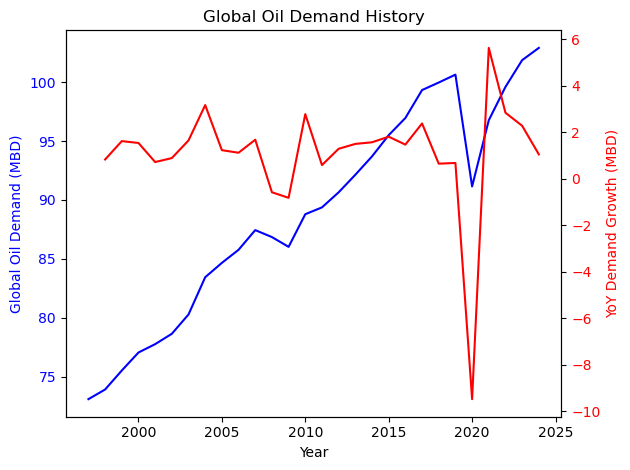

In [6]:
# Plot out global oil demand history

# Create a figure and an axes object
fig, ax1 = plt.subplots()

# Plot on the primary y-axis
ax1.plot(df[["Year"]], df[["Global Oil Demand"]], 'b-', label='Global Oil Demand')
ax1.set_xlabel('Year')
ax1.set_ylabel('Global Oil Demand (MBD)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot on the secondary y-axis
ax2.plot(df[["Year"]], df[["YoY Global Oil Demand Growth (MBD)"]], 'r-', label='YoY Demand Growth (MBD)')
ax2.set_ylabel('YoY Demand Growth (MBD)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a title and legend
plt.title('Global Oil Demand History')
fig.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

### Question 2: What does the global GPD growth look like?

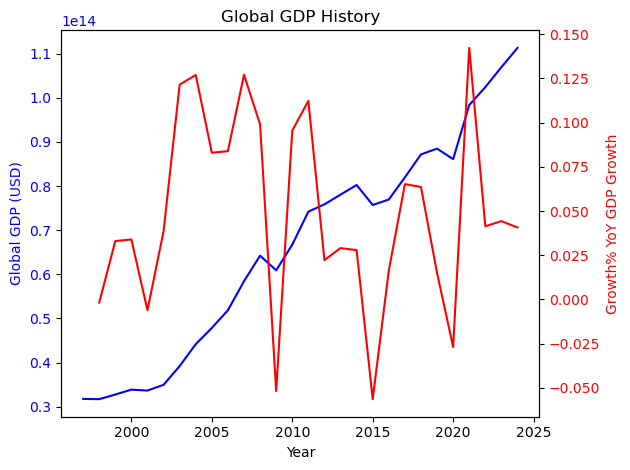

In [7]:
# Plot out global GDP history

# Create a figure and an axes object
fig, ax1 = plt.subplots()

# Plot on the primary y-axis
ax1.plot(df[["Year"]], df[["Global GDP"]], 'b-', label='Global GDP')
ax1.set_xlabel('Year')
ax1.set_ylabel('Global GDP (USD)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot on the secondary y-axis
ax2.plot(df[["Year"]], df[["Growth% YoY GDP Growth"]], 'r-', label='Growth% YoY GDP Growth')
ax2.set_ylabel('Growth% YoY GDP Growth', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a title and legend
plt.title('Global GDP History')
fig.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

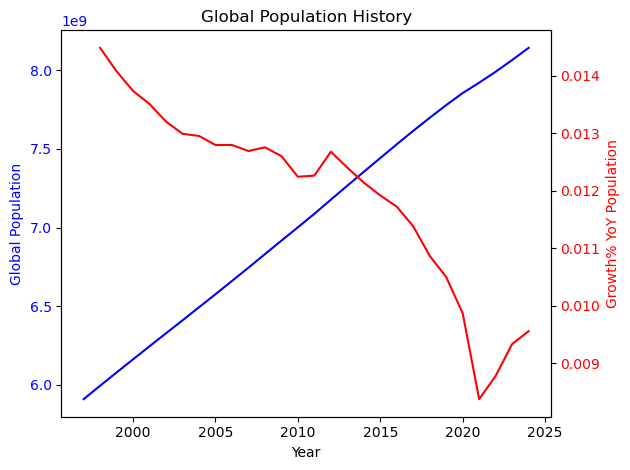

In [8]:
# Plot out global Population history

# Create a figure and an axes object
fig, ax1 = plt.subplots()

# Plot on the primary y-axis
ax1.plot(df[["Year"]], df[["Global Population"]], 'b-', label='Global Population')
ax1.set_xlabel('Year')
ax1.set_ylabel('Global Population', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot on the secondary y-axis
ax2.plot(df[["Year"]], df[["Growth% YoY Population"]], 'r-', label='Growth% YoY Population')
ax2.set_ylabel('Growth% YoY Population', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a title and legend
plt.title('Global Population History')
fig.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

### Question 3: What does the crude oil price history look like?

Text(0.5, 1.0, 'Brent Oil Price History')

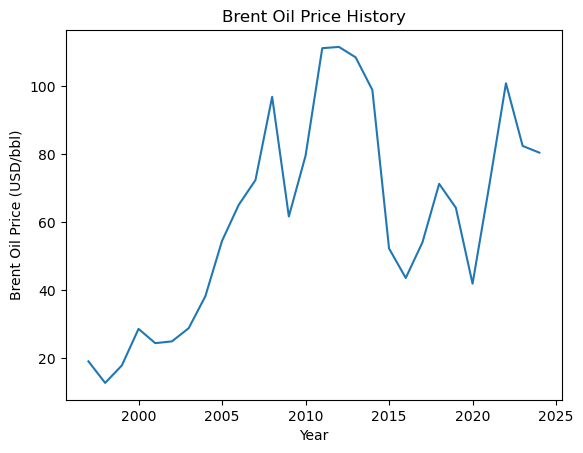

In [9]:
# Brent Price History
plt.plot(df[["Year"]],df[["Brent Oil Price"]])
plt.xlabel("Year")
plt.ylabel("Brent Oil Price (USD/bbl)")
plt.title("Brent Oil Price History")

Text(0.5, 1.0, 'Urbanization History')

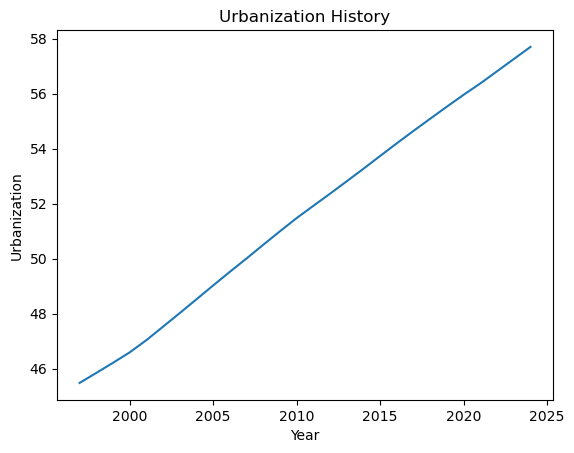

In [10]:
# Urbanization History
plt.plot(df[["Year"]],df[["Urbanization"]])
plt.xlabel("Year")
plt.ylabel("Urbanization")
plt.title("Urbanization History")

### Question 4: How does global oil demand correlate with global GDP and crude oil price?

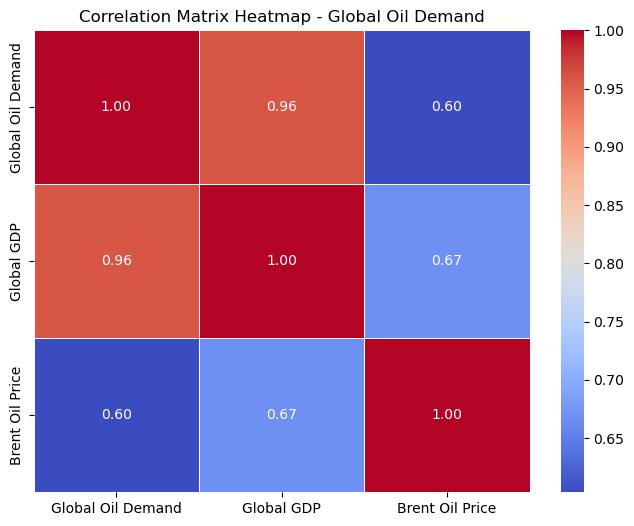

In [11]:
# Plot out the correlation maxtrix in heat map
correlation_matrix = df_cleaned[['Global Oil Demand', 'Global GDP', 'Brent Oil Price']].corr()
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap - Global Oil Demand') # Add a title
plt.show()

## 3. Modeling
### 3.1 Select Model

In [12]:
## 3. Modeling¶
### 3.1 Select Model

# Linear regression model
X=df_cleaned[['Global GDP', 'Brent Oil Price']]
y=df_cleaned[['Global Oil Demand']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear_model_1 = LinearRegression()

### 3.2 Train and Parameter Optmization

In [13]:
### 3.2 Training and Parameter Optimization

# Train the linear regression model

Linear_model_1.fit(X_train, y_train)

y_pred = Linear_model_1.predict(X_test)


print(f"Intercept: {Linear_model_1.intercept_}")
print(f"Coefficient: {Linear_model_1.coef_[0]}")




Intercept: [67.43141567]
Coefficient: [ 3.44266958e-13 -1.88283874e-02]


## 4. Evaluation
### 4.1 Metric Selection and Unseen Data

In [14]:
## 4. Evaluation
### 4.1 Metric Selection and Unseen Data


r_squared = Linear_model_1.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r_squared}")
print(f"Mean Squared Error: {mse}")


R-squared: 0.8863451371896806
Mean Squared Error: 6.922738214793458


## 5. Deployment
### 5.1 Dashboard

Text(0.5, 1.0, 'Training Set')

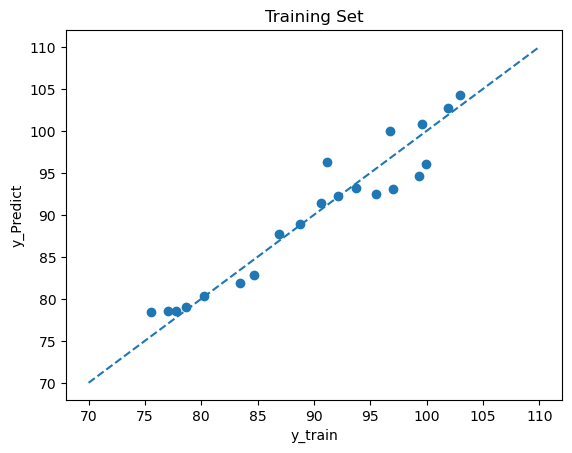

In [15]:
##5. Deployment
### 5.1 Dashboard

# Plot out the training set model fitting results
plt.scatter(y_train,Linear_model_1.predict(X_train))
plt.plot([70,110],[70,110],linestyle='--')
plt.xlabel("y_train")
plt.ylabel("y_Predict")
plt.title("Training Set")

Text(0.5, 1.0, 'Testing Set')

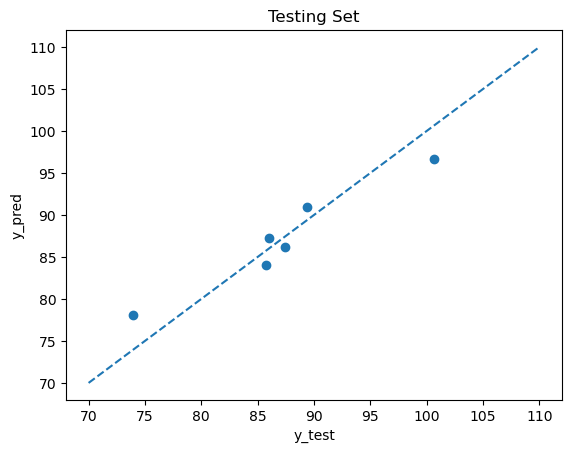

In [16]:
# Plot out the testing set model predicting results
plt.scatter(y_test,y_pred)
plt.plot([70,110],[70,110],linestyle='--')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("Testing Set")